# The Matrix of a Linear Transformation

In [100]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [101]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

Not all linear transformations are matrix-vector multiplications.   But, __every linear transformation from vectors to vectors is a matrix multiplication.__ 

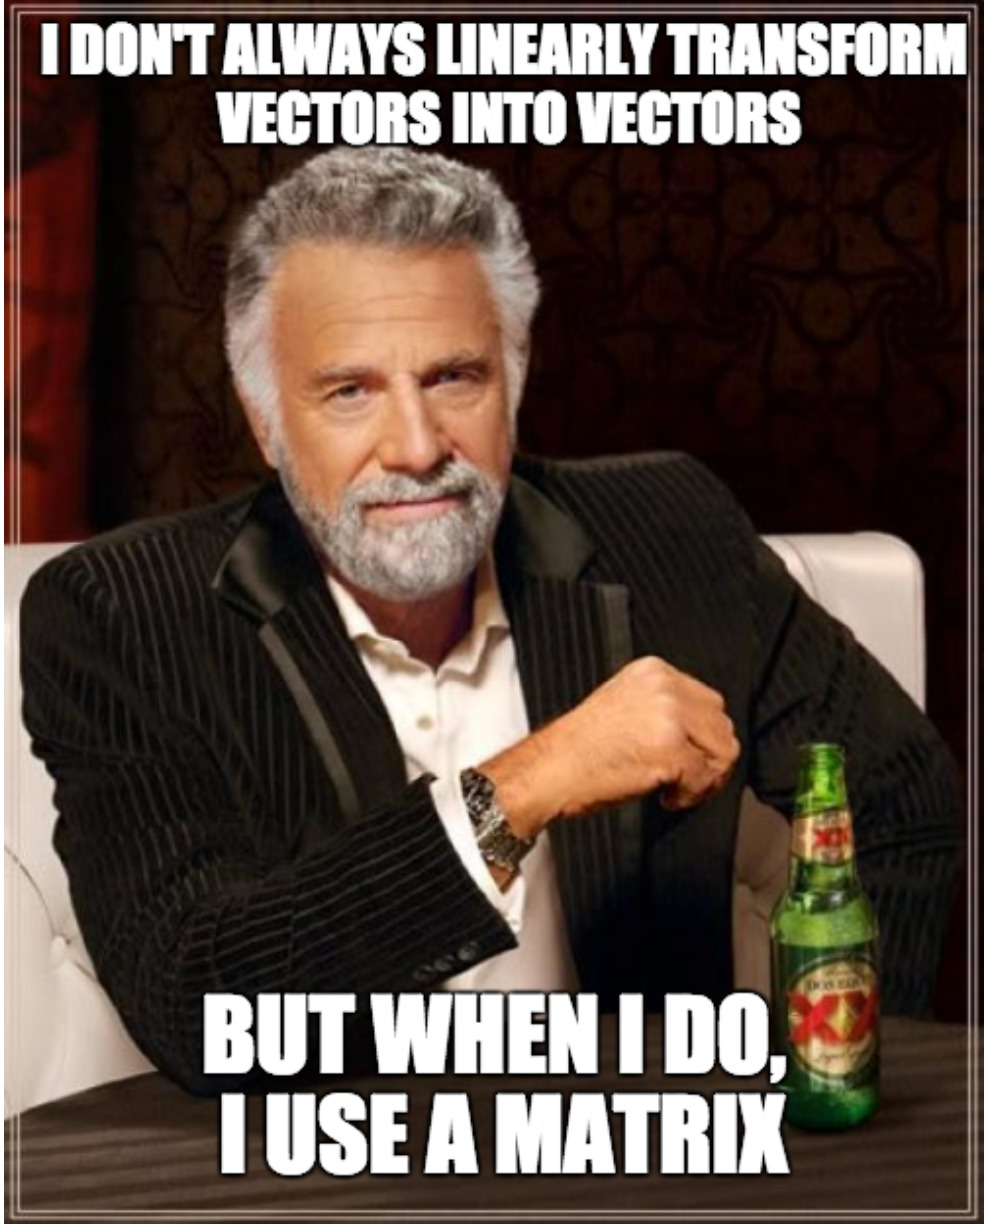

In [102]:
# image credit: https://imgflip.com/memetemplate/The-Most-Interesting-Man-In-The-World
sl.hide_code_in_slideshow()
display(Image("images/Dos-Equis-Linear-Transform.jpg", width=450))

__Theorem.__  Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ be a linear transformation.   There there is a unique matrix $A$ such that:

$$ T({\bf x}) = A{\bf x} \;\;\; \mbox{for all}\; {\bf x} \in \mathbb{R}^n.$$

In fact, $A$ is the $m \times n$ matrix whose $j$th column is the vector $T({\bf e_j})$, where ${\bf e_j}$ is the $j$the column of the identity matrix in $\mathbb{R}^n$:

$$A = \left[T({\bf e_1}) \dots T({\bf e_n})\right].$$

$A$ is called the _standard matrix_ of $T$.

__Proof.__  Write 

$${\bf x} = I{\bf x} = \left[{\bf e_1} \dots {\bf e_n}\right]\bf x$$

$$ = x_1{\bf e_1} + \dots + x_n{\bf e_n}.$$

Because $T$ is linear, we have:

$$ T({\bf x}) = T(x_1{\bf e_1} + \dots + x_n{\bf e_n})$$

$$ = x_1T({\bf e_1}) + \dots + x_nT({\bf e_n})$$

$$ = \left[T({\bf e_1}) \dots T({\bf e_n})\right] \, \left[\begin{array}{r}x_1\\\vdots\\x_n\end{array}\right] = A{\bf x}.$$

Hence we see that every linear transformation from vectors to vectors can be implemented as a matrix multiplication, and vice versa.  

The term _linear transformation_ focuses on a __property__ of the mapping, while the term _matrix multiplication_ focuses on how such a mapping is __implemented.__

For example, we find the standard matrix of a linear tranformation of $\mathbb{R}^2$ by asking what the transformation does to two particular points:

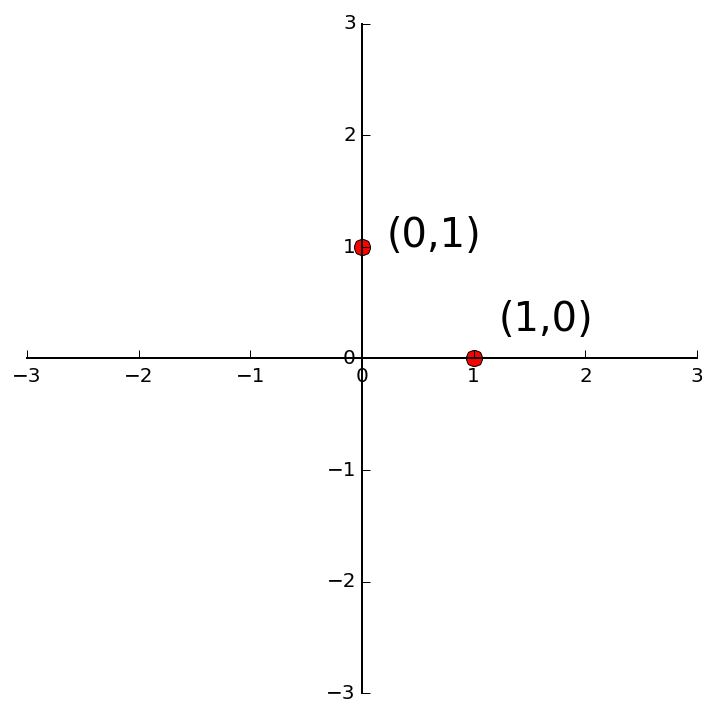

In [103]:
sl.hide_code_in_slideshow()
ax = dm.plotSetup(-3,3,-3,3,size=(6,6))
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20)
print('')

This is a __hugely__ powerful tool.  

Let's say we start from some given linear transformation; we can use this idea to find the matrix that implements that linear transformation.  

For example, let's see how to compute the linear transformation that is a rotation.

(By the way, can you see that a rotation is a linear transformation?)

__Example.__  Let $T: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ be the transformation that rotates each point in $\mathbb{R}^2$ about the origin through an angle $\varphi$, with counterclockwise rotation for a positive angle.  Find the standard matrix $A$ of this transformation.

__Solution.__  The columns of $I$ are ${\bf e_1} = \left[\begin{array}{r}1\\0\end{array}\right]$ and ${\bf e_2} = \left[\begin{array}{r}0\\1\end{array}\right].$

Referring to the diagram below, we can see that $\left[\begin{array}{r}1\\0\end{array}\right]$ rotates into $\left[\begin{array}{r}\cos\varphi\\\sin\varphi\end{array}\right],$ and $\left[\begin{array}{r}0\\1\end{array}\right]$ rotates into $\left[\begin{array}{r}-\sin\varphi\\\cos\varphi\end{array}\right].$

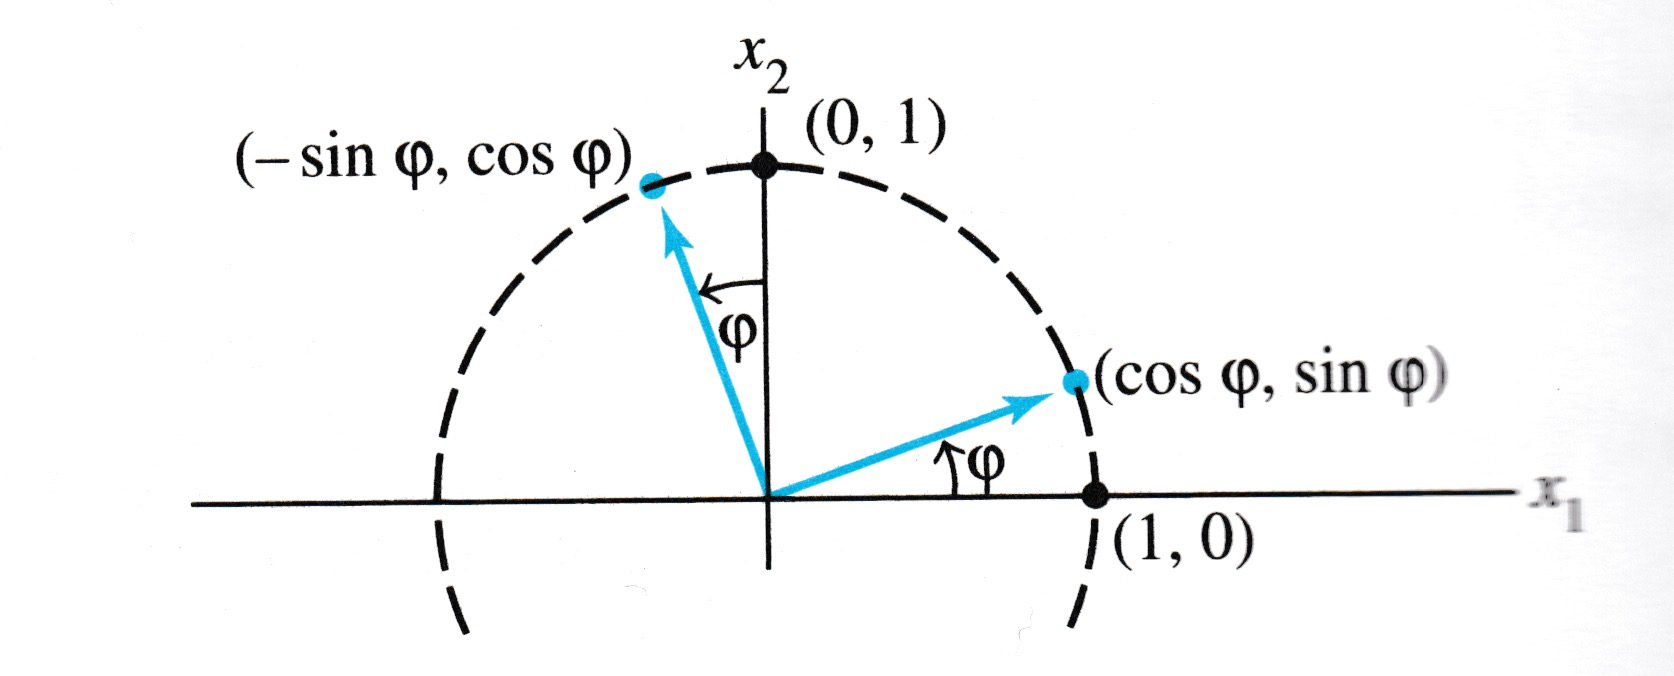

In [104]:
# image credit: Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/rotate-example.jpeg", width=550))

So by the Theorem above, 

$$ A = \left[\begin{array}{rr}\cos\varphi&-\sin\varphi\\\sin\varphi&\cos\varphi\end{array}\right].$$

To demonstrate the use of a rotation matrix, let's rotate the following shape:

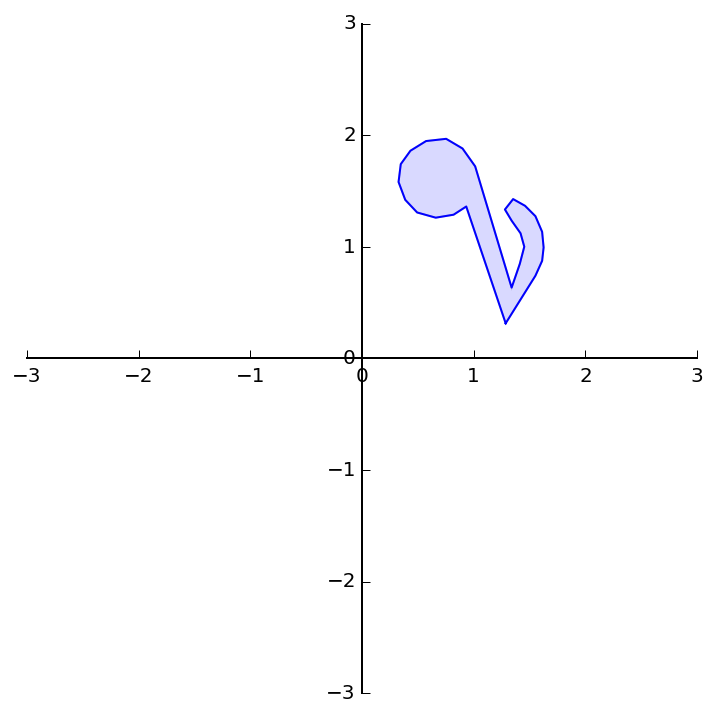

In [105]:
dm.plotSetup()
note = dm.mnote()
dm.plotShape(note)

The variable `note` is a array of 26 vectors in $\R^2$ that define its shape.   

In other words, it is a 2 $\times$ 26 matrix.

To rotate `note` we need to multiply each column of `note` by the rotation matrix $A$.

In `numpy,` every matrix has a `.dot()` method.  This method multiplies the matrix by every
column of its argument, returing the results as a matrix. That is:

`A.dot(B)`

where `A` and `B` are matrices, will multiply `A` by every column of `B,` and the resulting vectors will be formed
into a matrix.

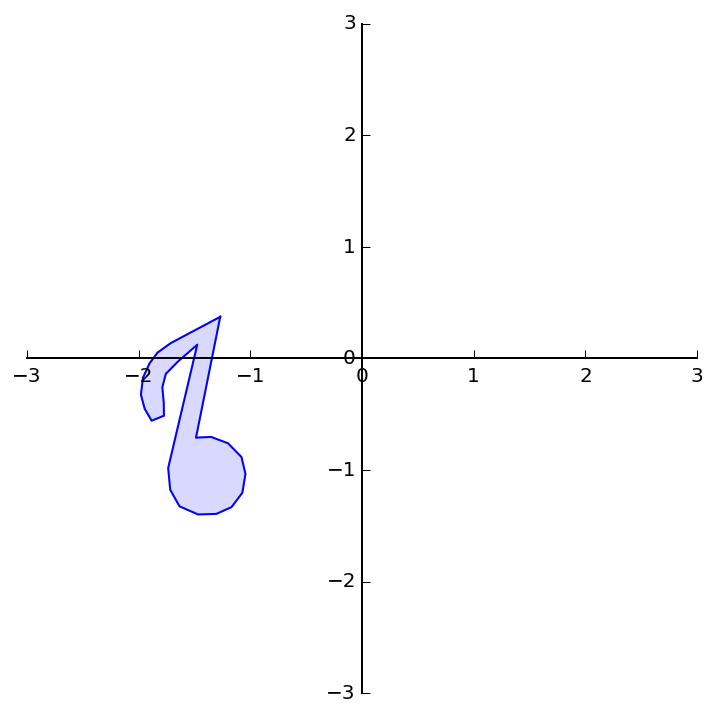

In [137]:
dm.plotSetup()
angle = 150.0
phi = (angle/180) * np.pi
A = np.array(
    [[np.cos(phi), -np.sin(phi)],
     [np.sin(phi), np.cos(phi)]])
rnote = A.dot(note)
dm.plotShape(rnote)

## Question Time! Q8.1

## Geometric Linear Transformations of $\mathbb{R}^2$

Let's use our understanding of how to constuct linear transformations to look at some specific linear transformations of $\mathbb{R}^2$ to $\mathbb{R}^2$.

First, let's recall the linear transformation 

$$T(\vx) = r\vx.$$

With $r > 1$, this is a dilation.  It moves every vector further from the origin.  

Let's say the dilation is by a factor of 2.5.

To construct the matrix $A$ that implements this transformation, we ask: where do ${\bf e_1}$ and ${\bf e_2}$ go?

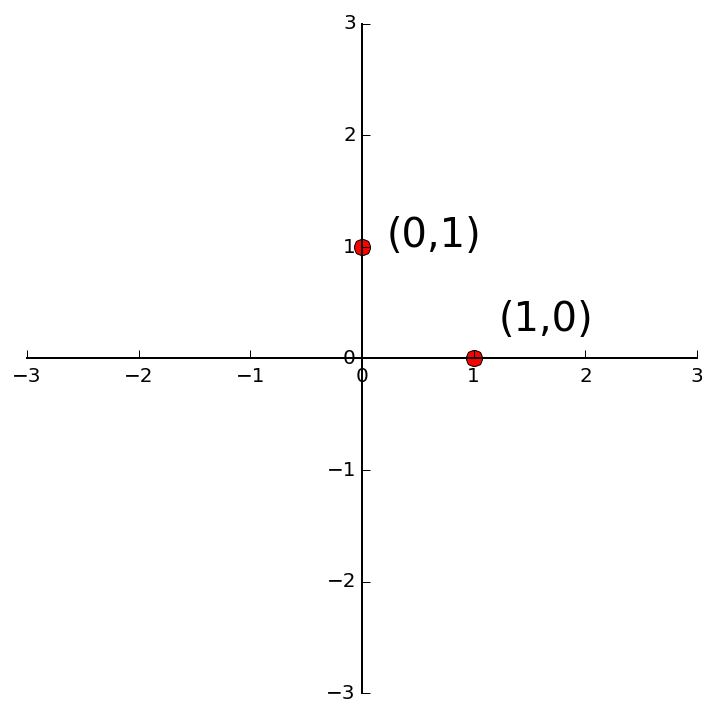

In [107]:
sl.hide_code_in_slideshow()
ax = dm.plotSetup()
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20)
print('')

Under the action of $A$, $\ve_1$ goes to $\mat{{c}2.5\\0}$ and $\ve_2$ goes to $\mat{{c}0\\2.5}$.

So the matrix $A$ must be $\mat{{cc}2.5&0\\0&2.5}$.

A = 
 [[ 2.5  0. ]
 [ 0.   2.5]]


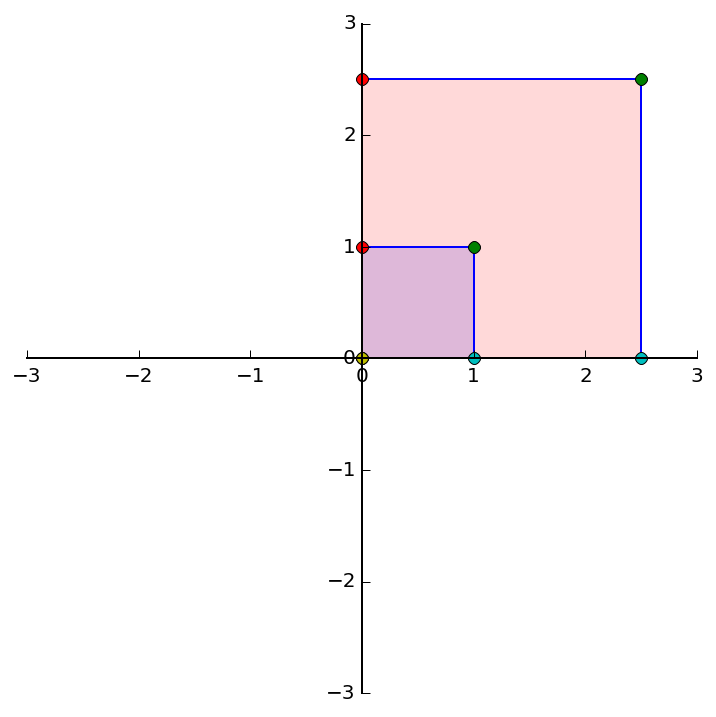

In [108]:
square = np.array(
    [[0,1,1,0],
     [1,1,0,0]])
A = np.array(
    [[2.5, 0],
     [0, 2.5]])
print('A = \n',A)
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')

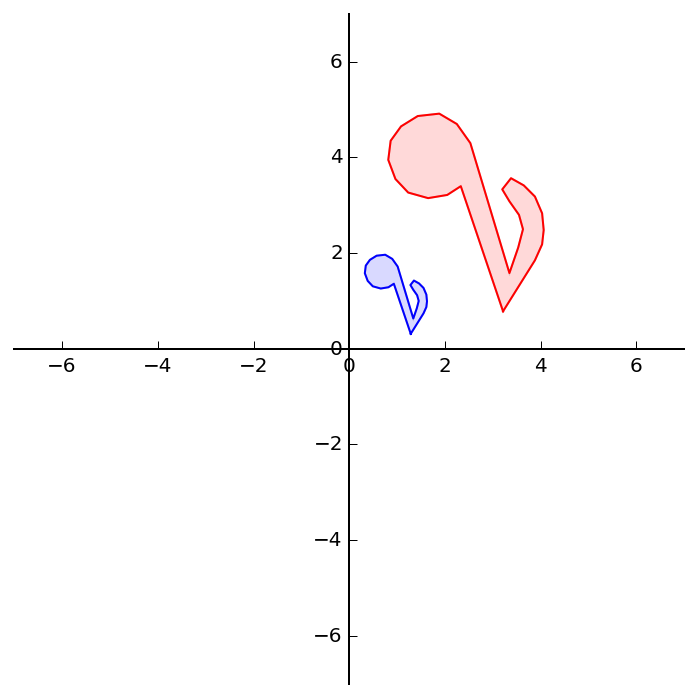

In [109]:
dm.plotSetup(-7,7,-7, 7)
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

OK, now let's reflect through the $x_1$ axis.   Where do ${\bf e_1}$ and ${\bf e_2}$ go?

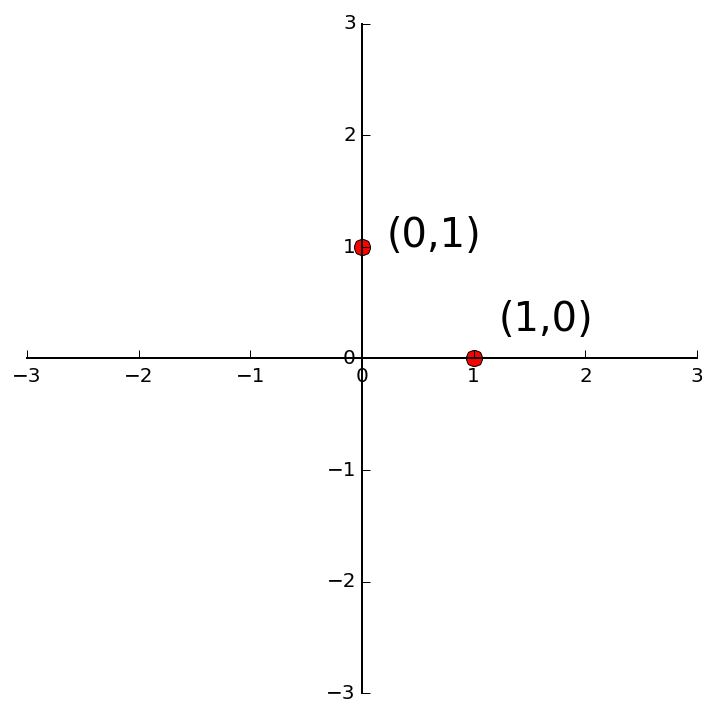

In [110]:
sl.hide_code_in_slideshow()
ax = dm.plotSetup()
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20)
print('')

<IPython.core.display.Latex object>

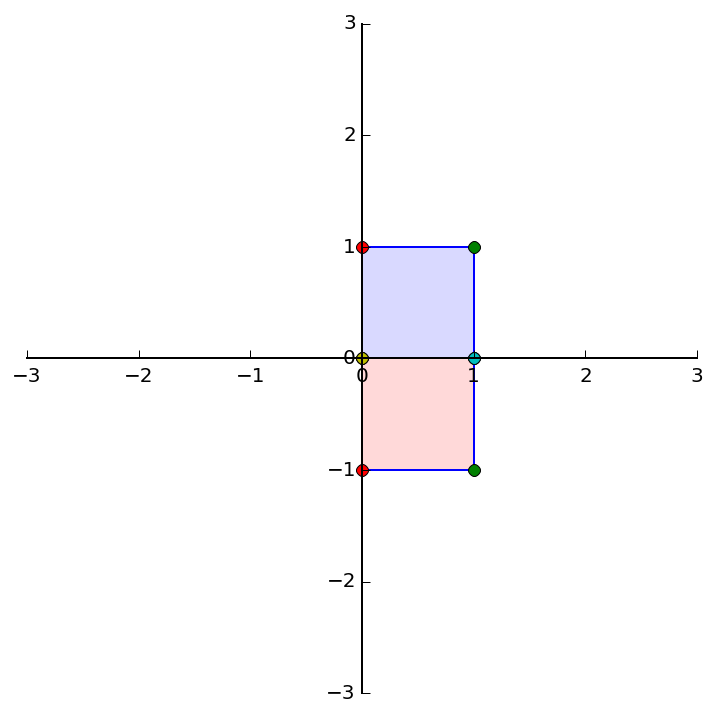

In [111]:
A = np.array(
    [[1, 0],
     [0,-1]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Reflection through the $x_1$ axis')

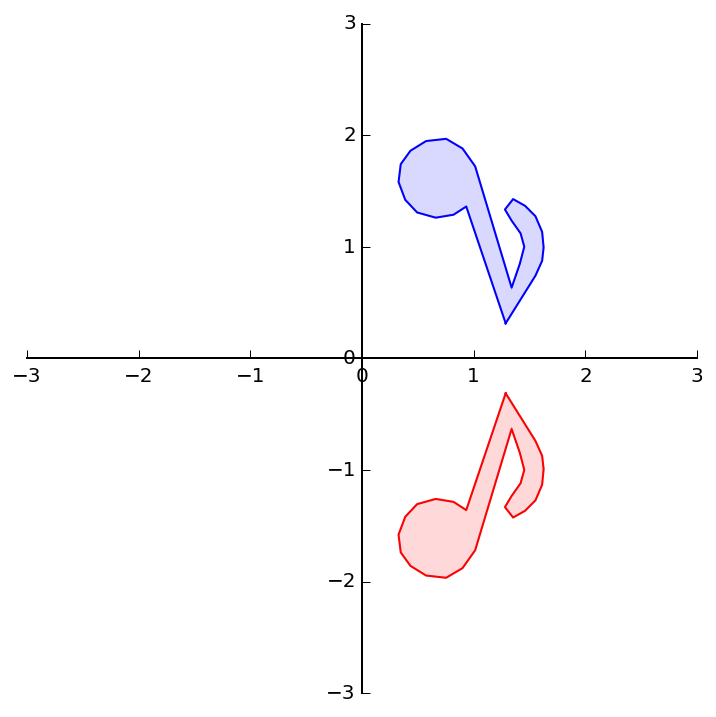

In [112]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

What about reflection through the $x_2$ axis?

<IPython.core.display.Latex object>

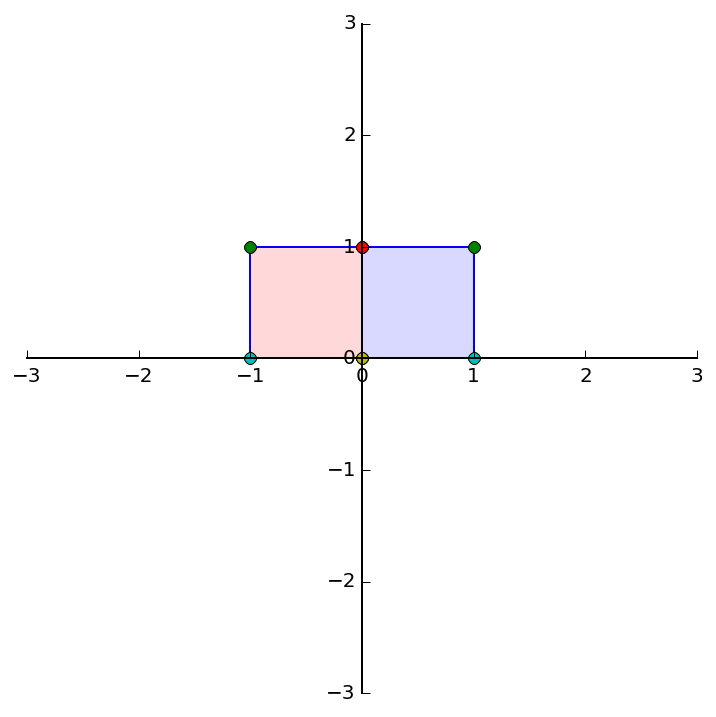

In [113]:
A = np.array(
    [[-1,0],
     [0, 1]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Reflection through the $x_2$ axis')

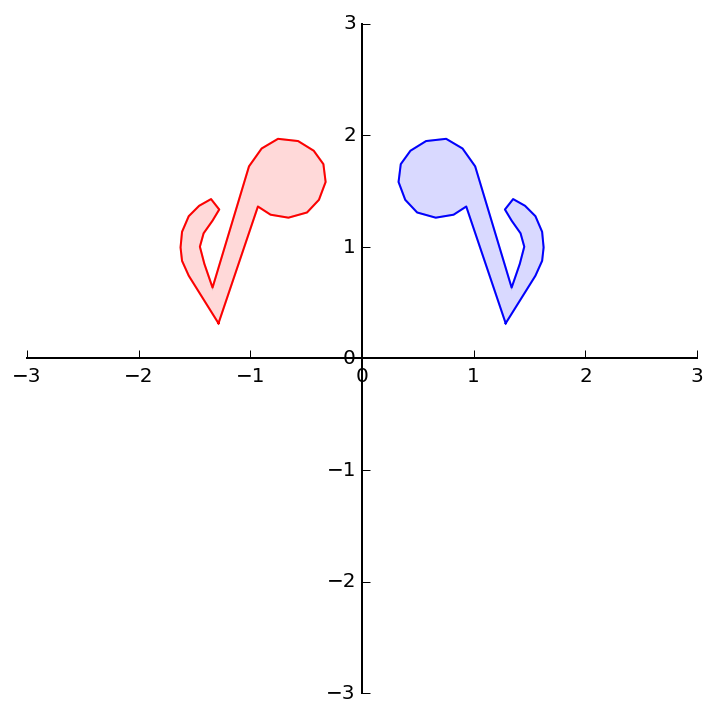

In [114]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

What about reflection through the line $x_1 = x_2$?

<IPython.core.display.Latex object>

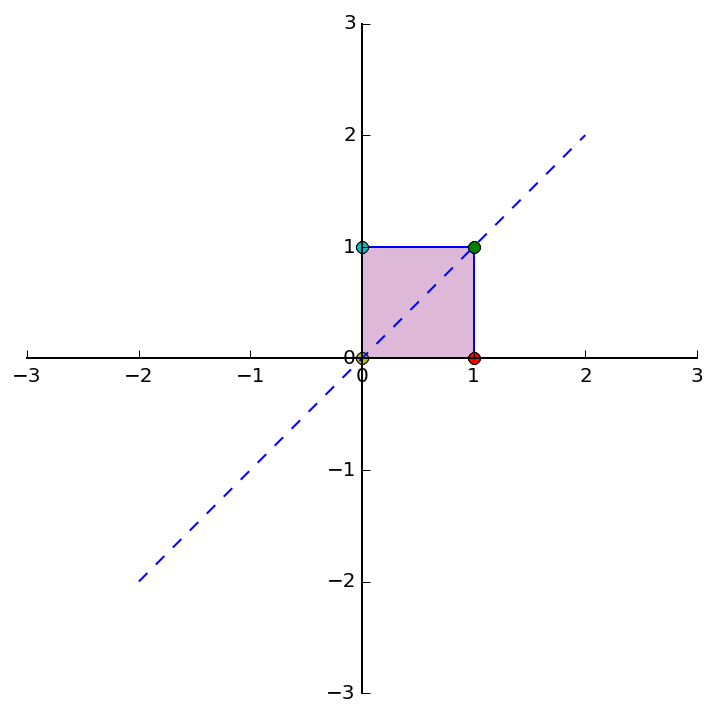

In [115]:
A = np.array(
    [[0,1],
     [1,0]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
plt.plot([-2,2],[-2,2],'b--')
Latex(r'Reflection through the line $x_1 = x_2$')

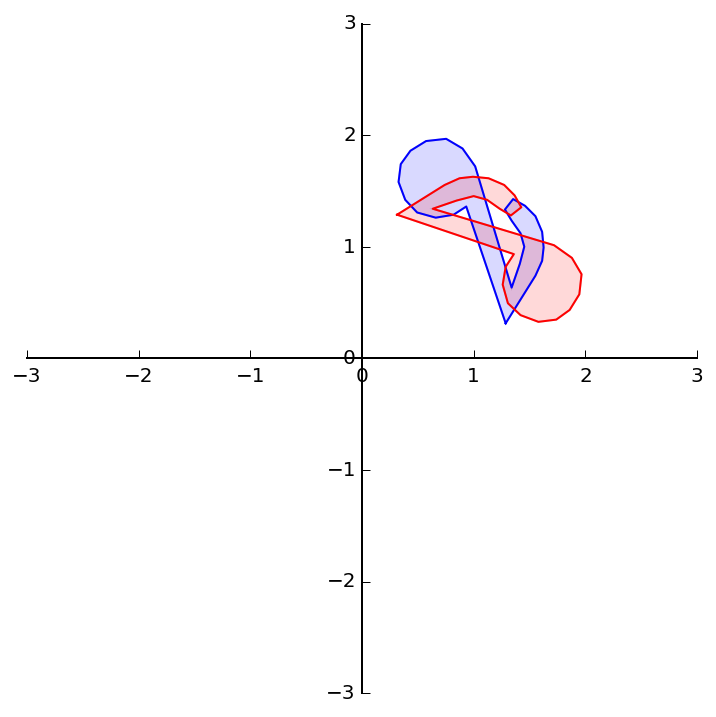

In [116]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

What about reflection through the line $x_1 = -x_2$?

<IPython.core.display.Latex object>

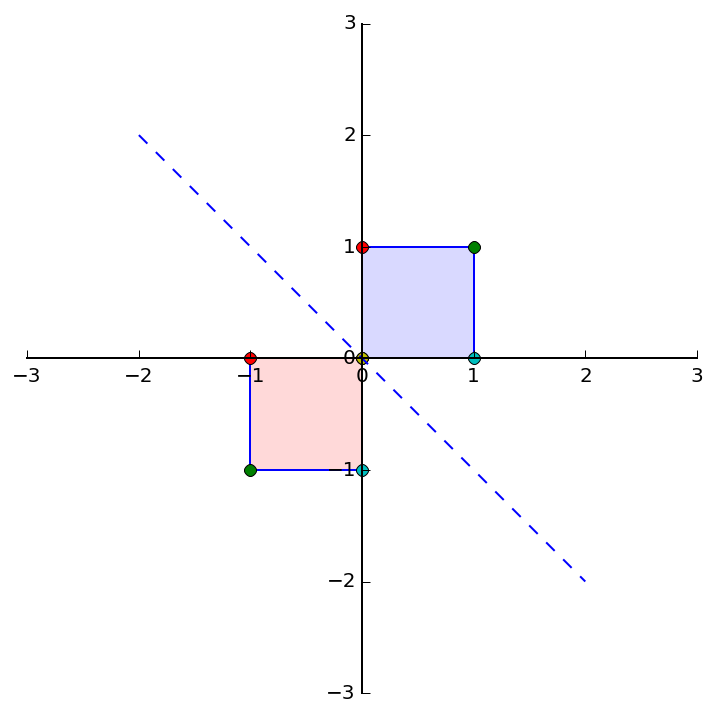

In [117]:
A = np.array(
    [[ 0,-1],
     [-1, 0]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
plt.plot([-2,2],[2,-2],'b--')
Latex(r'Reflection through the line $x_1 = -x_2$')

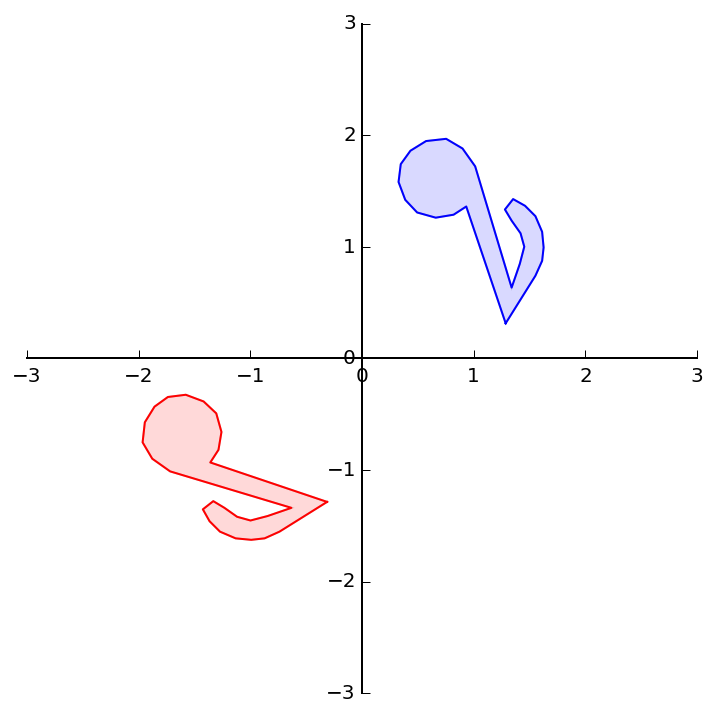

In [118]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

What about reflection through the origin?

<IPython.core.display.Latex object>

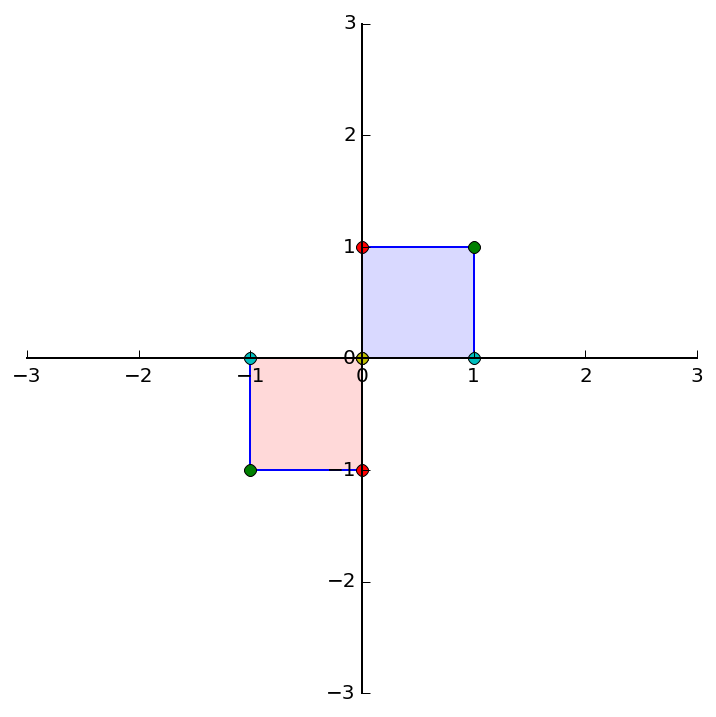

In [119]:
A = np.array(
    [[-1, 0],
     [ 0,-1]])
ax = dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Reflection through the origin')

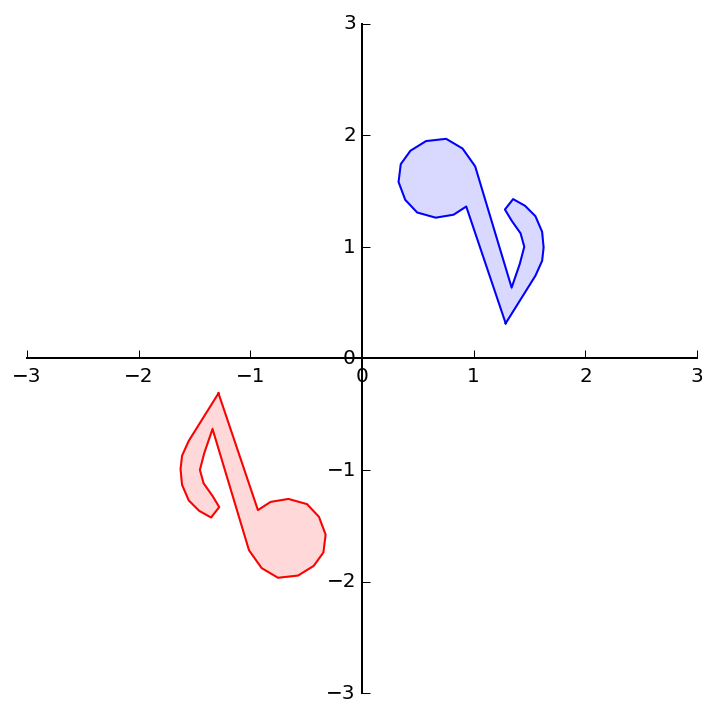

In [120]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

<IPython.core.display.Latex object>

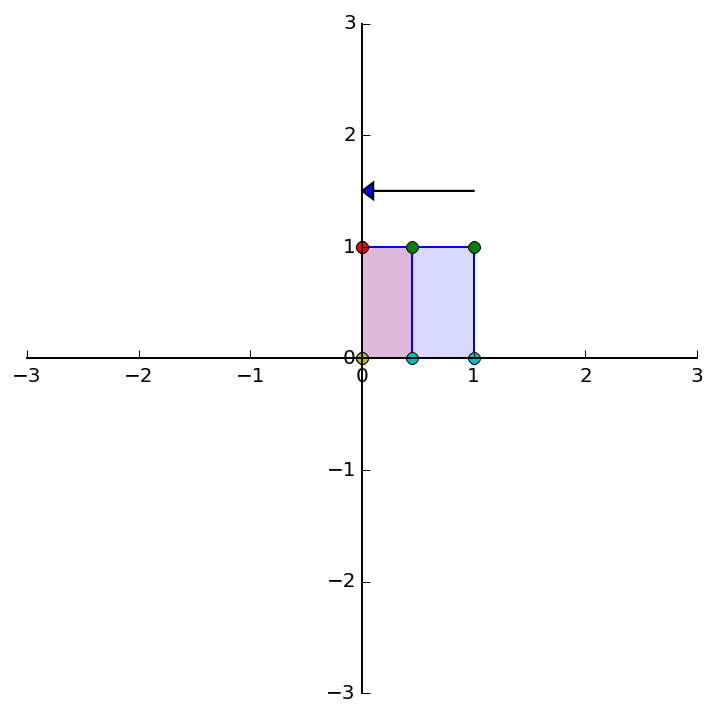

In [121]:
A = np.array(
    [[0.45, 0],
     [0,    1]])
ax = dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
ax.arrow(1.0,1.5,-1.0,0,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Horizontal Contraction')

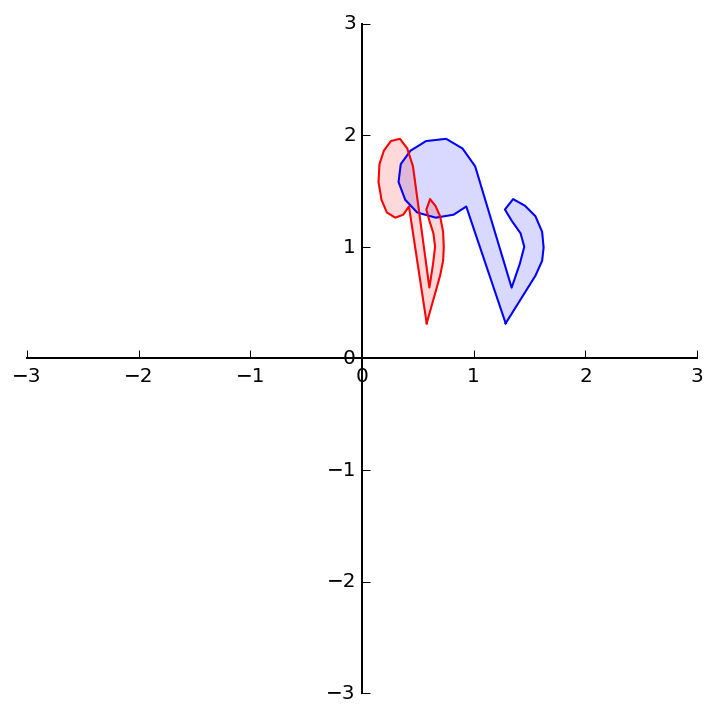

In [122]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

<IPython.core.display.Latex object>

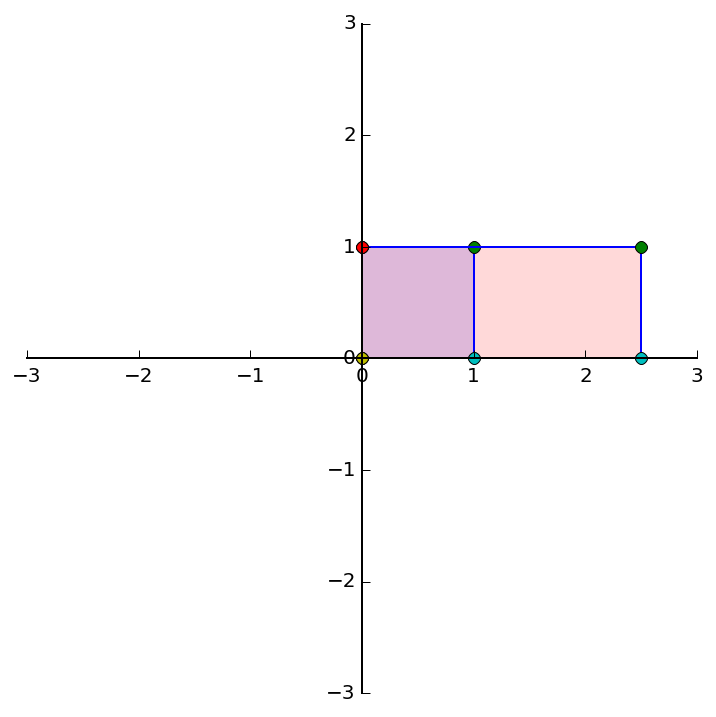

In [123]:
A = np.array(
    [[2.5,0],
     [0,  1]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Horizontal Expansion')

<IPython.core.display.Latex object>

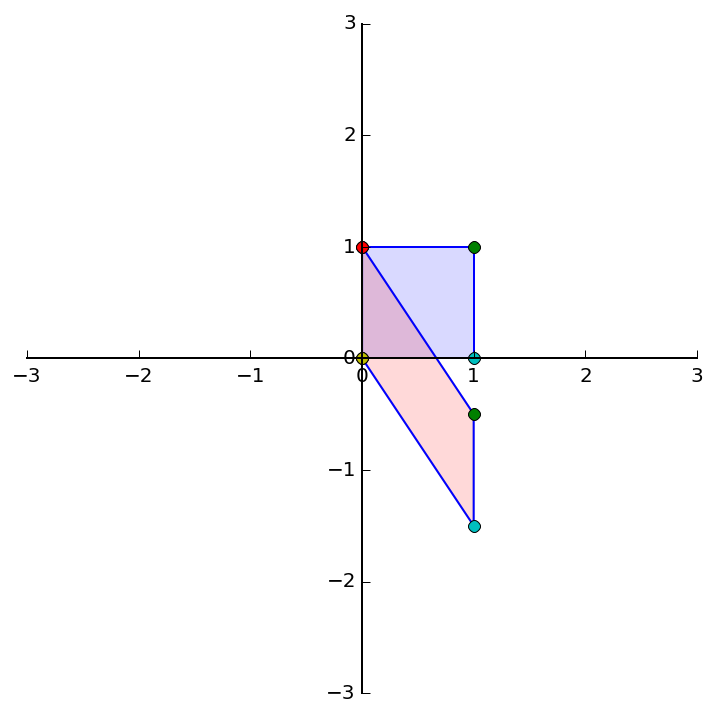

In [124]:
A = np.array(
    [[   1, 0],
     [-1.5, 1]])
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
Latex(r'Vertical Shear')

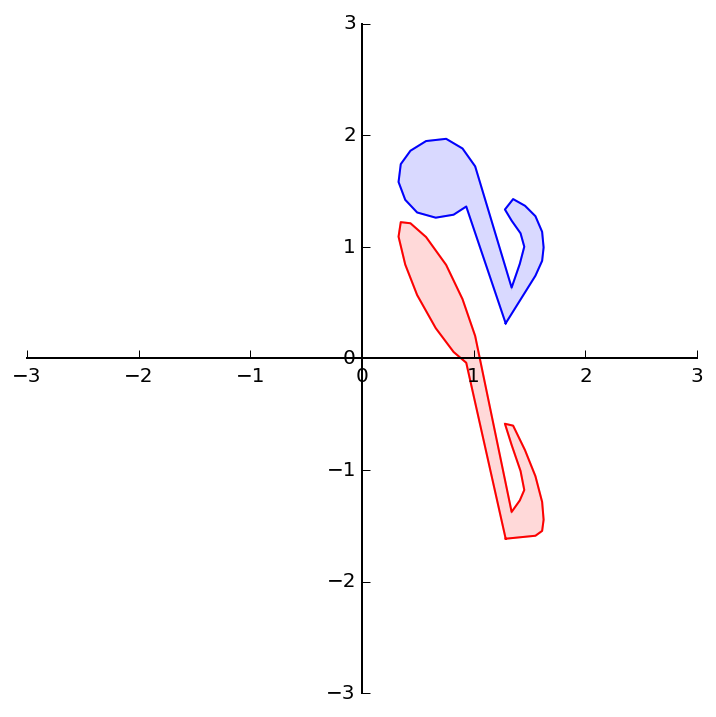

In [125]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

<IPython.core.display.Latex object>

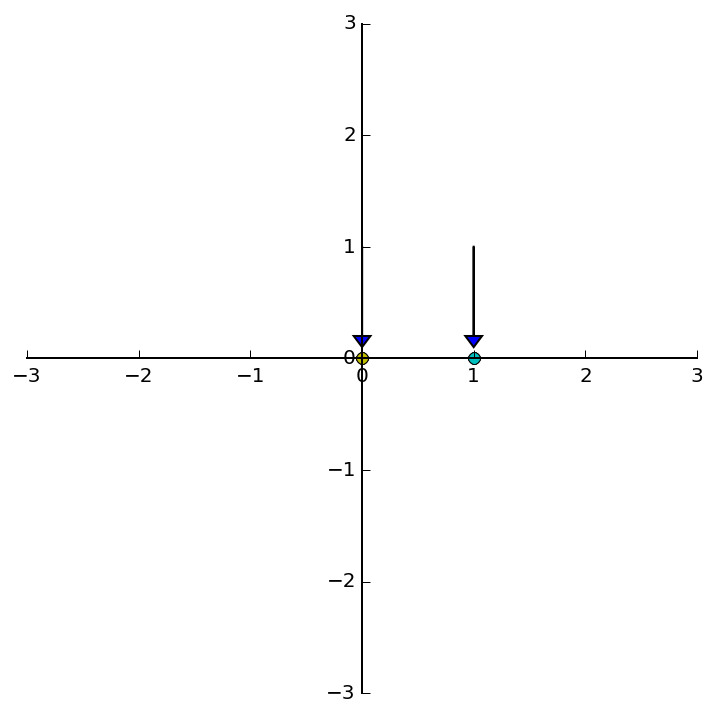

In [126]:
A = np.array(
    [[1,0],
     [0,0]])
ax = dm.plotSetup()
# dm.plotSquare(square)
dm.plotSquare(A.dot(square),'r')
ax.arrow(1.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
ax.arrow(0.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Projection onto the $x_1$ axis')

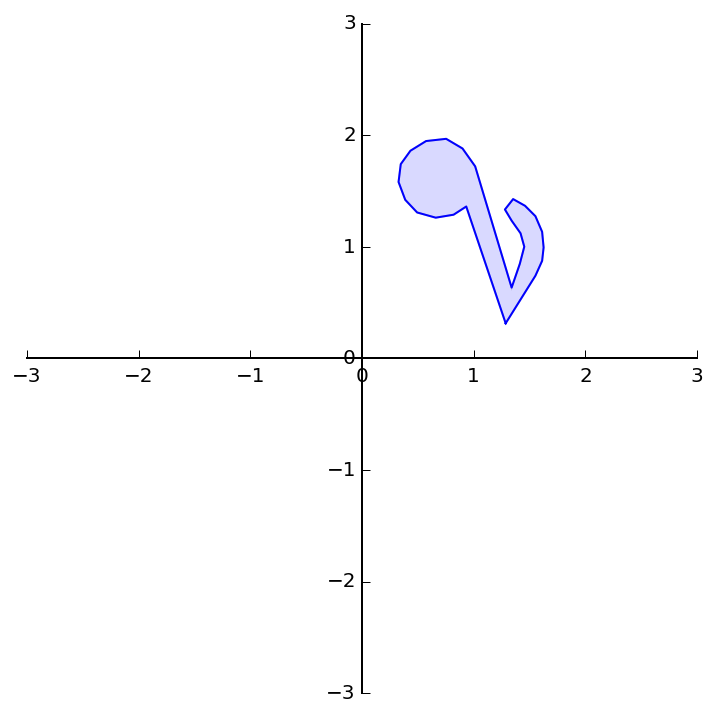

In [127]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A.dot(note),'r')

<IPython.core.display.Latex object>

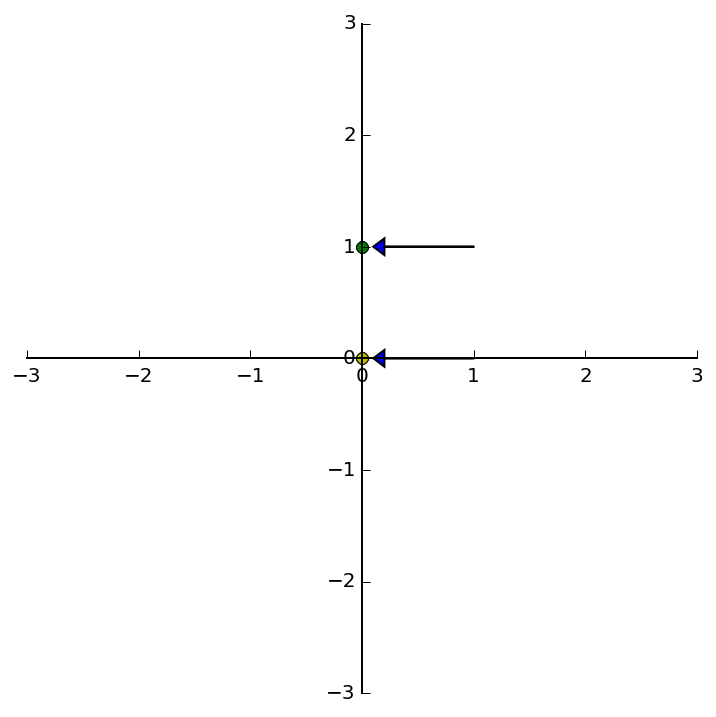

In [128]:
A = np.array(
    [[0,0],
     [0,1]])
ax = dm.plotSetup()
# dm.plotSquare(square)
dm.plotSquare(A.dot(square))
ax.arrow(1.0,1.0,-0.9,0,head_width=0.15, head_length=0.1, length_includes_head=True)
ax.arrow(1.0,0.0,-0.9,0,head_width=0.15, head_length=0.1, length_includes_head=True)
Latex(r'Projection onto the $x_2$ axis')

## Existence and Uniqueness

Notice that some of these transformations map multiple inputs to the same output, and some are incapable of generating certain outputs.

We need some terminology to understand these properties of linear transformations.

__Definition.__ A mapping $T: \R^n \rightarrow \R^m$ is said to be __onto__ $\R^m$ if each $\vb$ in $\R^m$ is the image of _at least one_ $\vx$ in $\R^n$.

Informally, $T$ is onto if any element of its codomain is in its range.

Another (important) way of thinking about this is that $T$ is onto if there is a solution $\vx$ of

$$T(\vx) = \vb$$

for all possible $\vb.$

This is asking an __existence__ question about a solution of the equation $T(\vx) = \vb$ for all $\vb.$

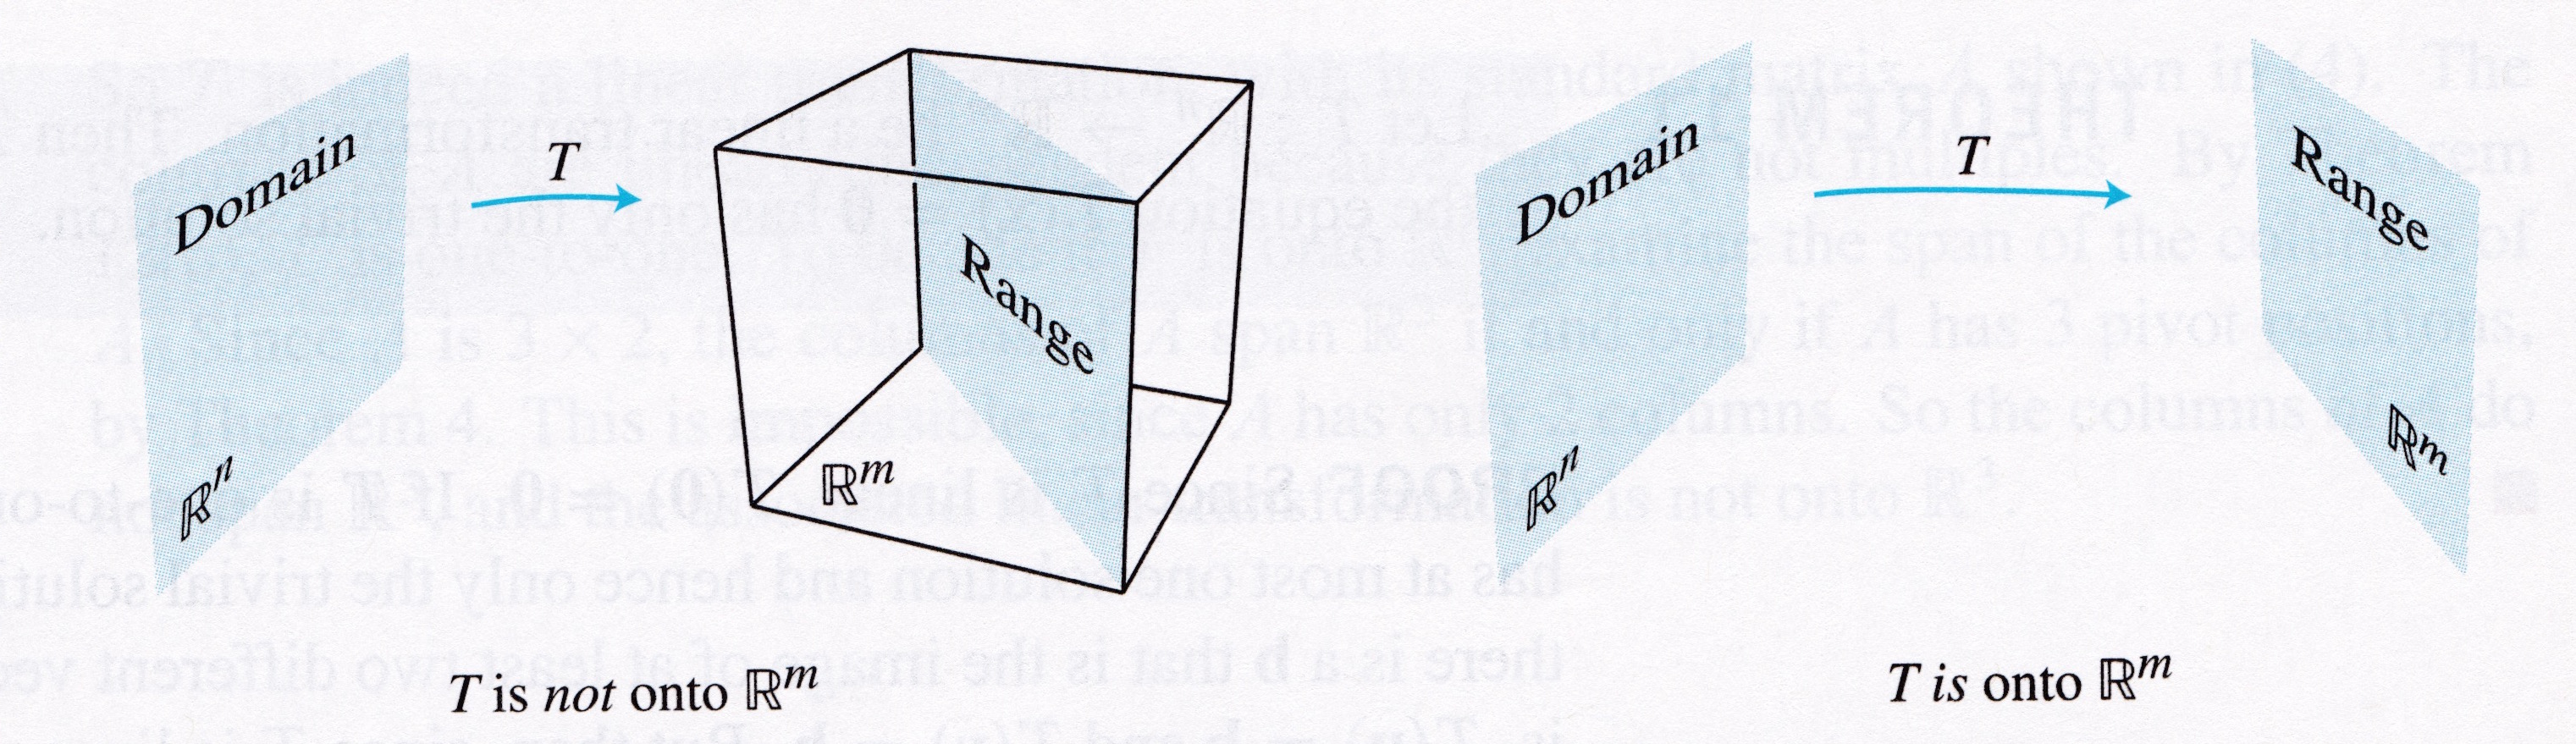

In [129]:
# image credit: Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-1-9-3.jpeg", width=650))

## Question Time! Q8.X

__Definition.__  A mapping $T: \R^n \rightarrow \R^m$ is said to be __one-to-one__ if each $\vb$ in $\R^m$ is the image of _at most one_ $\vx$ in $\R^n$.

If $T$ is one-to-one, then for each $\vb,$ the equation $T(\vx) = \vb$ has either a unique solution, or none at all.

This is asking an __existence__ question about a solution of the equation $T(\vx) = \vb$ for all $\vb$.

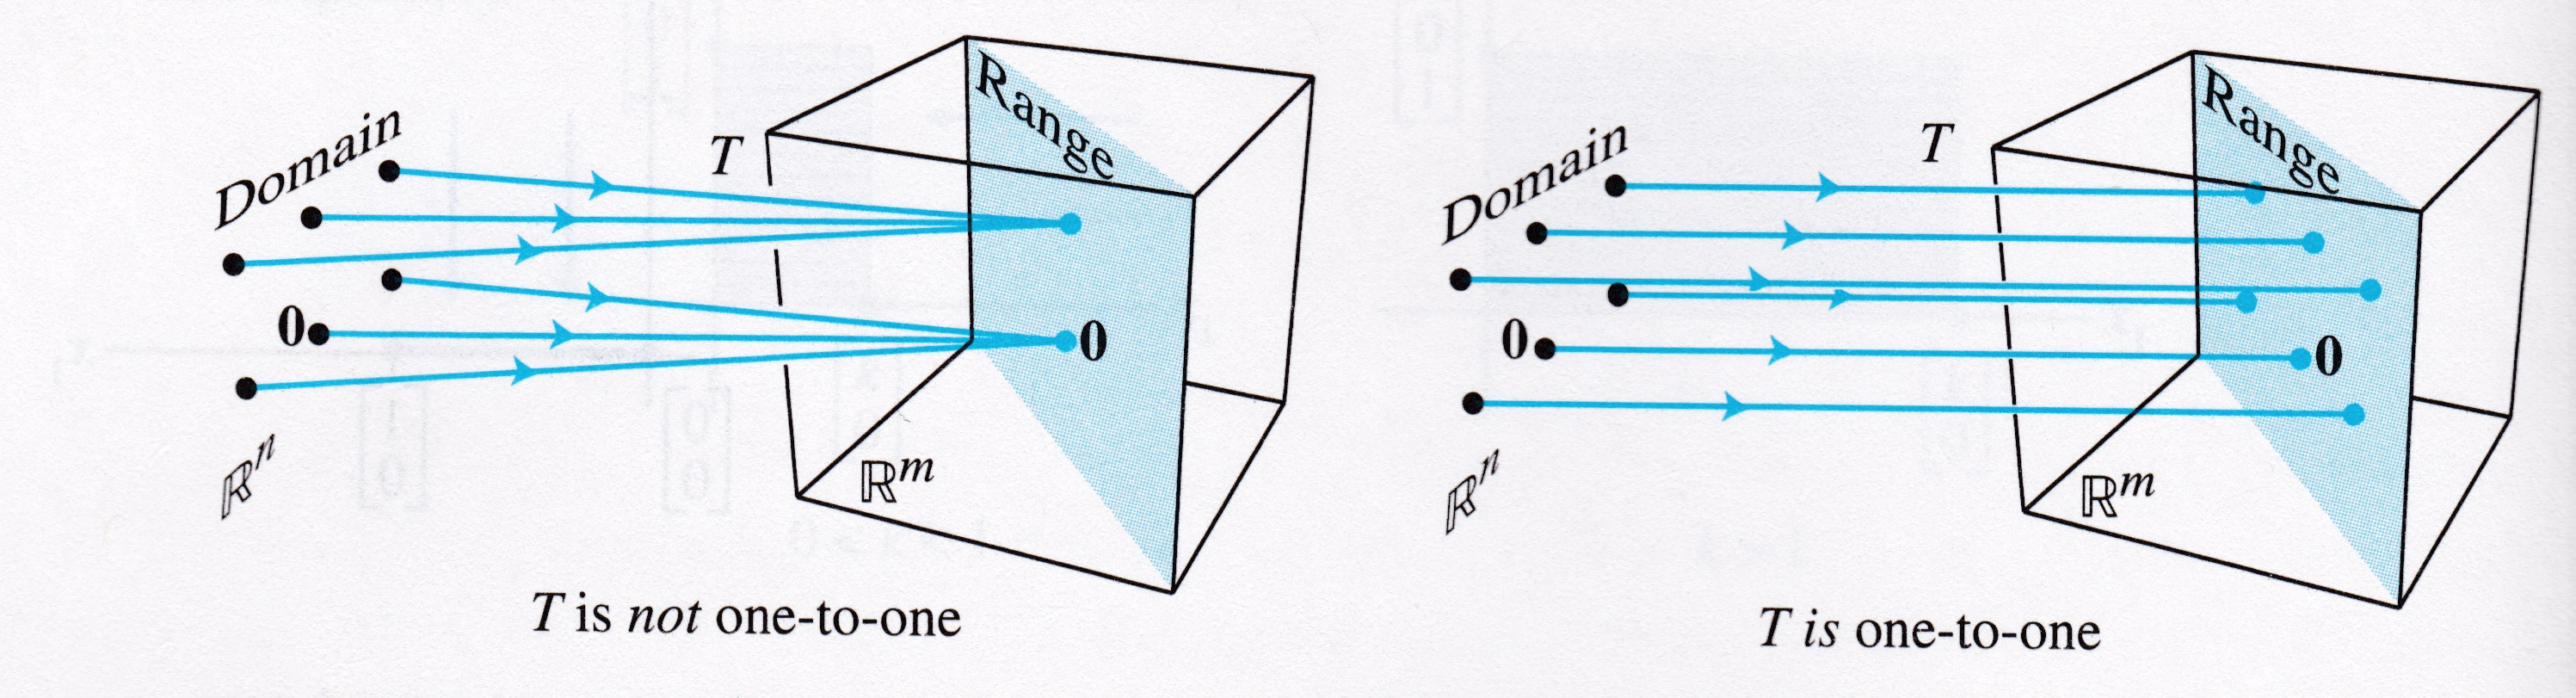

In [130]:
# image credit: Lay, 4th edition
sl.hide_code_in_slideshow()
display(Image("images/Lay-fig-1-9-4.jpeg", width=650))

Let's examine the relationship between these ideas and some previous definitions.

If $A\vx = \vb$ is consistent for all $\vb$, is $T(\vx) = A\vx$  onto?  one-to-one?

If $A\vx = \vb$ is consistent and has a unique solution for all $\vb$, is $T(\vx) = A\vx$ onto?  one-to-one?

If $A\vx = \vb$ is not consistent for all $\vb$, is $T(\vx) = A\vx$  onto?  one-to-one?

If $T(\vx) = A\vx$ is onto, is $A\vx = \vb$ consistent for all $\vb$?   is the solution unique for all $\vb$?

If $T(\vx) = A\vx$ is one-to-one, is $A\vx = \vb$ consistent for all $\vb$?   is the solution unique for all $\vb$?